In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
var = pd.read_csv('titanic.csv')
var.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [30]:
var1 = pd.get_dummies(var.Sex)
df = pd.concat([var,var1],axis='columns')
df = df.drop(['Sex'],axis='columns')
X = df[['Pclass','Age','Fare','female','male']]
y = df.Survived
X.Age = X.Age.fillna(int(df.Age.mean()))
X

C:\Users\jhapr\AppData\Local\Temp\ipykernel_13548\149402082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Age = X.Age.fillna(int(df.Age.mean()))


,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,29.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
model.score(X_test,y_test)

0.770949720670391

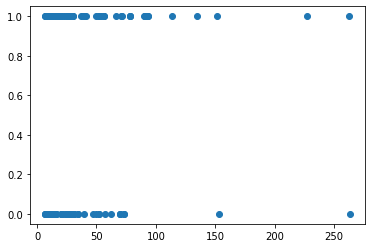

In [41]:
plt.scatter(X_test.Fare, model.predict(X_test))